# 2021 - 1
# TP 1 - Machine Learning

Aluno: Giovanni Ferreira Martinelli

Matrícula: 2015124823

# Tarefa

## Enunciado:

Neste trabalho deverá ser realizada uma comparação entre seis métodos de classificação: 
1. Naive Bayes
2. Decision Tree
3. k-Nearest Neighbors
4. Support Vector Machines
5. Random Forest 
6. Gradient Tree Boosting. 

Além disto você deverão ser realizados os experimentos listados abaixo específicos para cada método. 

* **Naive Bayes:** Apenas um experimento para servir de baseline
* **Decision Tree:** Variar a altura máxima da árvore (incluindo permitir altura ilimitada) e
mostrar os resultados graficamente
* **SVM:** Avaliar os kernels linear, sigmoid, polinomial e RBF
* **k-NN:** Variar o número k de vizinhos e mostrar os resultados graficamente
* **Random Forest:** Variar o número de árvores e mostrar os resultados graficamente.
* **Gradient Tree Boosting:** Variar o número de iterações e mostrar os resultados graficamente

Pode ser necessário:
- Normalizar os dados 

- Testar diferentes valores para os hiperparâmetros dos métodos para se obter bons resultados (não é necessário entregar todas as combinações testadas, apenas a de melhor resultado, exceto os casos que foram pedidos abaixo). 

- A avaliação dos métodos deverá ser feita usando:
  - Acurácia 
  - Validação cruzada k-fold com k igual a 5.

## Setando environment

**Descomente para setar o ambiente** caso seja necessário

A versão do python utilizada foi a 3.8.10

In [1]:
# !python3 -m pip install virtualenv
# !python3 -m virtualenv venv 
 
## Selecione o kernel com venv
# !source venv/bin/activate

#!python3 -m pip install pandas numpy scikit-learn matplotlib
;

''

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
                                              
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Configuração MatplotLib

In [3]:
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 15
plt.rcParams['axes.titlesize']  = 15


# Carregando Dataset

In [4]:
DATASET_PATH = Path("dataset/")
DATASET_NAME = "koi_data.csv"

def load_dataset():
    koi_df = pd.read_csv(DATASET_PATH / DATASET_NAME)
    return koi_df

koi_df = load_dataset() 
koi_df.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


Em relação aos dados faltantes, não há nenhum neste conjunto de dados.

# Limpando os dados

Remove-se nome do planeta, já que é uma feature que não ajuda a classificar o mesmo.


In [5]:
koi_df = koi_df.drop(columns=['kepoi_name'])
koi_df

,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,89.66,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,89.57,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,67.09,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,85.41,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,60.92,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,FALSE POSITIVE,373.89398,0.963,27.66000,730.0,0.03288,0.00771,2.51,0.8885,88.57,...,-1.000,-0.300,0.00060,0.00030,2.360,-0.990,2.550,2.370,-0.910,2.540
5198,FALSE POSITIVE,8.58987,0.765,4.80600,87.7,0.00936,0.18863,1.11,0.0779,85.14,...,1.100,1.200,-0.00008,-0.00010,1.260,-1.200,1.750,1.350,-1.300,1.840
5199,FALSE POSITIVE,0.52770,1.252,3.22210,1579.2,0.29763,0.16318,29.35,0.0128,20.78,...,0.792,-0.484,-0.00024,0.00018,2.132,-1.757,2.763,2.344,-1.756,2.929
5200,FALSE POSITIVE,0.68140,0.147,0.86500,103.6,0.00944,8.97692,1.07,0.0157,88.60,...,7.200,-5.600,-0.00072,0.00050,3.410,-3.650,5.000,3.380,-3.890,5.160


# Selecionando os labels do conjunto de dados

In [6]:
X = koi_df.drop("koi_disposition", axis=1)
y = koi_df["koi_disposition"].replace({ 'CONFIRMED': 1, 'FALSE POSITIVE': 0 }) # does not change in place

print("Linhas: ", X.shape[0], " Feature Vector Size:", X.shape[1])
print("Labels: ", y.shape[0])

Linhas:  5202  Feature Vector Size: 41
Labels:  5202


### É possível ver que há mais falsos positivos, do que confirmados, representando **um desblanceamento de classes** 


In [7]:
y.value_counts()

0    3098
1    2104
Name: koi_disposition, dtype: int64

# Funções auxiliares

## **`plot_the_learning_curve:`** 
Exibe o gráfico da curva de aprendizado para valores diferentes do set de treinamento. 

**`Recebe:`**

Classificador

**`Por que ?`**

As curvas de aprendizado possibilitam perceber se a precisão do modelo aumenta a medida que aumentamos sua capacidade. Fazendo a análise da curva pode-se inferir se o modelo consegue generalizar bem ou se ele está propenso a overfit.

In [8]:
def plot_the_learning_curve(classifier, ax_plt):
    train_size = [500, 1000, 2500, 4000]
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X, y, cv=5,
        shuffle=True,
        random_state=42,
        scoring='accuracy',
        train_sizes=train_size)

    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    ax_plt.plot(train_sizes, train_mean, '--', color="#961515",  label="Training score")
    ax_plt.plot(train_sizes, test_mean, color="#2135a6", label="Cross-Validation score")

    ax_plt.set_xlabel("Training Set Size"), ax_plt.set_ylabel("Accuracy Score"), ax_plt.legend(loc="best")


Referências:

https://chrisalbon.com/code/machine_learning/model_evaluation/plot_the_learning_curve/

---

## **`plot_ROCs`**:
Renderiza um gráfico com as curvas ROC de cada um dos classificadore. 

**`Recebe: `**

lista de classificadores 


**`Por que ?`**

A curva ROC tem a utilidade de mostrar o quão acertivo o modelo é, através da relação entre True Positive Rate (TPR) e False Positive Rate (FPR). 

O TRP recebe todas a saídas positivas do modelo (1 ou "CONFIRMED") e mede em quantas dessas ele acertou, já o False Positive Rate analisa todos os erros produzidos e avalia quantos deles vieram de falsos positivos.

O valor da Area Under Curve (AUC) descreve a capacidade do modelo de prever as classes corretamente, ou seja quanto mais alto o valor da AUC, maior será a taxa de acerto do modelo em prever "FALSE POSITIVE" como "FALSE POSITIVE" e "CONFIRMED" como "CONFIRMED".

In [9]:
def plot_ROCs(classifiers):
    plt.figure()
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves')

    for name, classifier, _ in classifiers:
        if hasattr(classifier, "decision_function"):
            y_score = classifier.decision_function(X_test)
        else:
            y_score = classifier.predict_proba(X_test)[:, 1]
        
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label='%s (AUC area = %0.2f)' % (name, roc_auc))
        
    plt.legend(loc="lower right")
    plt.show()

`Referências: `

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

---


## **`plot_classifier_charts`**

Exibe um grid de classificadores. Para cada classificador exibe-se a curva de aprendizado e a matriz de confusão. 

A acurácia esperada (obtida no test_set) é exibida ao lado do título entre parênteses.

`Recebe:`

lista de classificadores 



In [10]:
def plot_classifier_charts(classifiers):
    if len(classifiers) == 1:
        plt.figure(figsize=(6, 6))
    else:
        plt.figure(figsize=(18, 6))
        
    
    i = 1
    for name, classifier, score in classifiers:
        ax = plt.subplot(2, len(classifiers), i)
        ax.set_title("%s, (accuracy: %.4f)" % (name, score))
        plot_the_learning_curve(classifier, ax)
        i += 1
    
    for name, classifier, _ in classifiers:
        ax = plt.subplot(2, len(classifiers), i)
        plot_confusion_matrix(classifier, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
        i += 1
        
    plt.tight_layout()
    plt.show()    

---

# Classe para auxiliar a criação dos plots

In [36]:
class ClassifierToPlot(object):
    def __call__(self, name, classifier):
        self.name = name
        self.classifier = classifier
        return [self.name, self.classifier]

classifier = ClassifierToPlot()

---

# Treino e avaliação


## **`k_fold_train`:** 

Treina no modelo utilizando k-fold com k = 5;

Executa o pipeline com a seguinte configuração:

- scaler: Executado pelo `StandardScaler()`, essa etapa aplica a mean normalization, que faz com que as entradas das features possuam valores contidos em um intervalo, isso ajuda o algoritmo a encontrar o mínimo local dando passos mais regulares, já que os valores das features estão mais próximas.

- classification: Essa etapa simplesmente recebe o classificador e o executa no final da execução da pipeline.

`Recebe:`

Classificador, Conjunto de dados de treinamento.

In [11]:
def k_fold_train(X_train_total, y_train_total, classifier):
    scores = []
    cv = KFold(n_splits=5, shuffle=True)
    
    for train_index, test_index in cv.split(X_train_total):
        X_train_p, X_test_p, y_train_p, y_test_p = \
            X_train_total[train_index], X_train_total[test_index], \
            y_train_total[train_index], y_train_total[test_index]
        
        classifier.fit(X_train_p, y_train_p)
        scores.append(classifier.score(X_test_p, y_test_p))
        
    return scores

## **`train_evaluate`:**

Executa o k_fold_train em cada classificador da lista passada. 

Então executa-se as funções de visualização.

`Recebe:`

Lista de classificadores 

In [12]:
def train_evaluate(classifiers):
    trained_classifiers = []
    for name, classifier in classifiers:
        classifier_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classification', classifier)
        ])
        
        k_fold_train(X_train.values, y_train.values, classifier_pipeline)
        score = classifier_pipeline.score(X_test, y_test)
        trained_classifiers.append([name, classifier_pipeline, score])
        
    plot_classifier_charts(trained_classifiers)          
    plot_ROCs(trained_classifiers)

# Experimentos

In [14]:
TEST_SIZE = 0.3
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Naive Bayes

**`Tarefa:`**

Apenas um experimento para servir de baseline


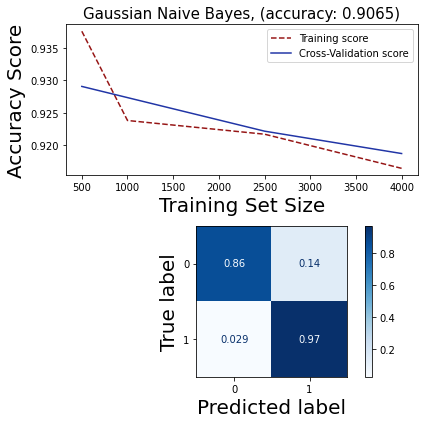

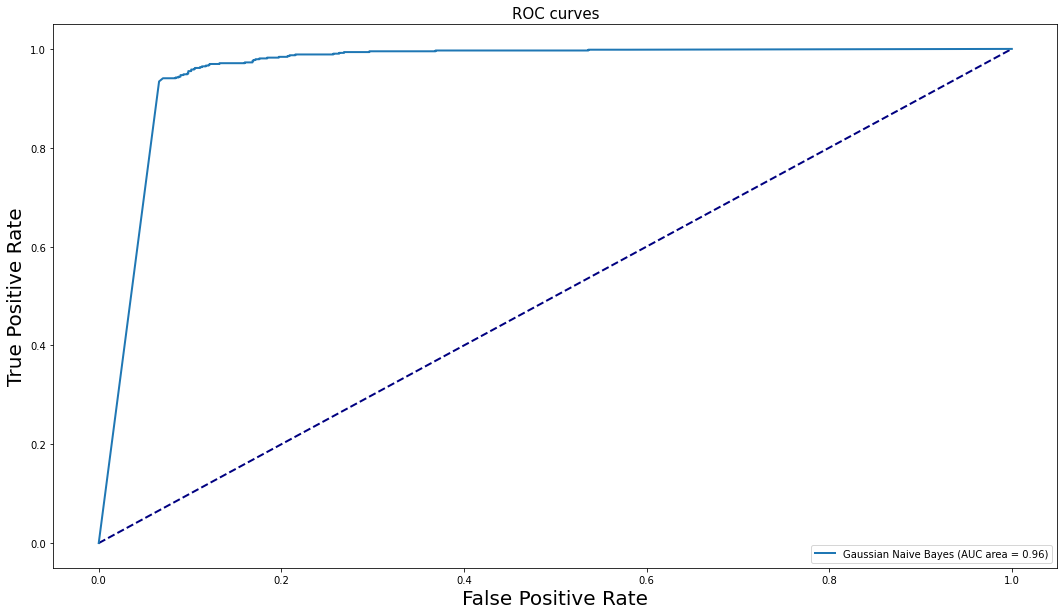

In [43]:
naive_bayes_classifiers = [
   classifier("Gaussian Naive Bayes", GaussianNB())
]

train_evaluate(naive_bayes_classifiers)

# Explicando os resultados

A curva de aprendizado demonstra que a medida que sua capacidade aumenta, sua precisão diminui.

A revocação do algoritmo possui um score de 0.97, porém a performance geral do modelo é afetada pelo valor de especificidade de 0.88, ou seja, \
a proporção de instâncias negativas que são classificadas corretamente como negativas é de 0.88. Podendo-se dizer que o modelo acerta mais a classe positiva que a negativa. 

Uma possível explicação para a precisão cair ao se aumentar o número de dados pode ser devida a má classificação dos falsos positivos pelo mesmo.

---

# Decision Tree

Árvores de decisão (DTs) são um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. \
O objetivo é criar um modelo que preveja o valor de uma variável de destino, aprendendo regras de decisão simples inferidas dos recursos de dados. \
Uma árvore pode ser vista como uma aproximação constante por partes. 

**`Tarefa:`** 

Variar a altura máxima da árvore (incluindo permitir altura ilimitada) e
mostrar os resultados graficamente.

Os valores de profundidade máxima da árvore foram: 5, 20, 30, 50 e sem limite

Aumentar ou diminuir a altura, aumenta ou diminui a capacidade do modelo

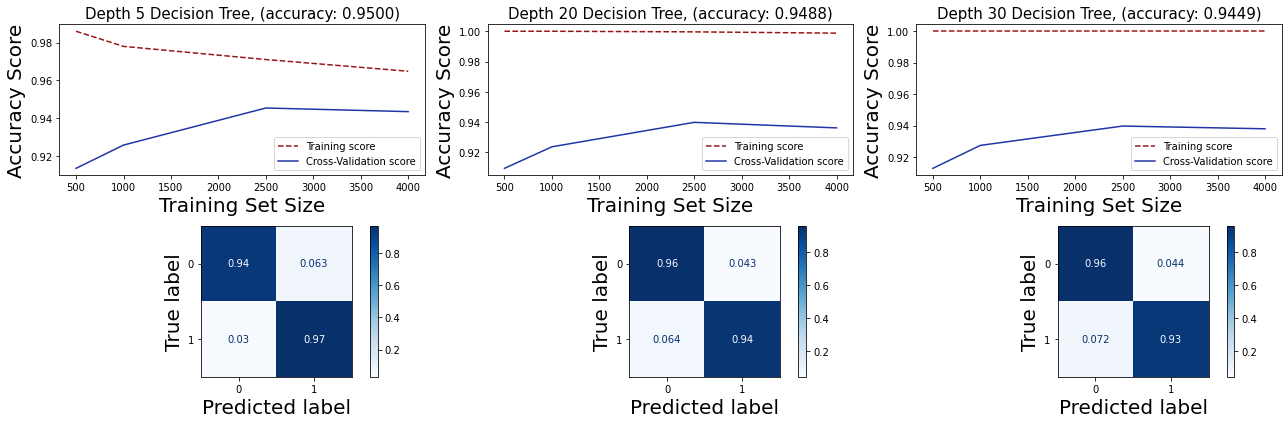

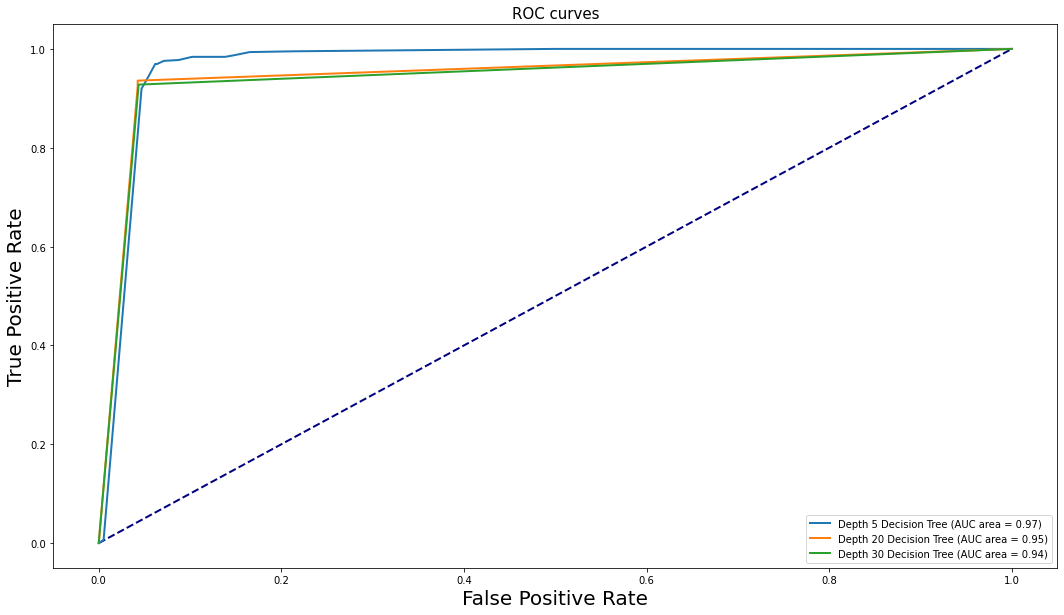

In [44]:
decision_tree_classifiers = [
    classifier('Depth 5 Decision Tree',  DecisionTreeClassifier(max_depth=5)),
    classifier('Depth 20 Decision Tree', DecisionTreeClassifier(max_depth=20)),
    classifier('Depth 30 Decision Tree', DecisionTreeClassifier(max_depth=30)),
]

train_evaluate(decision_tree_classifiers)

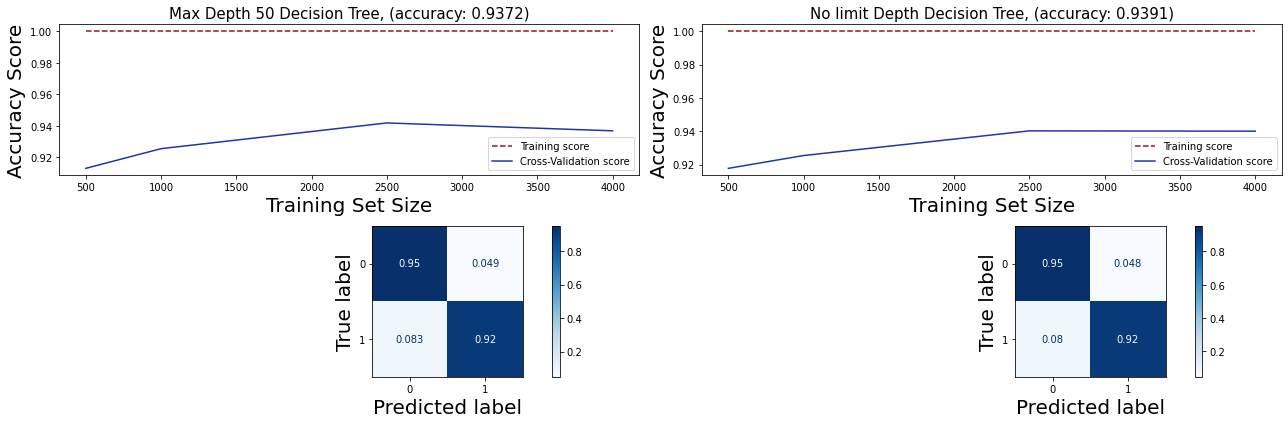

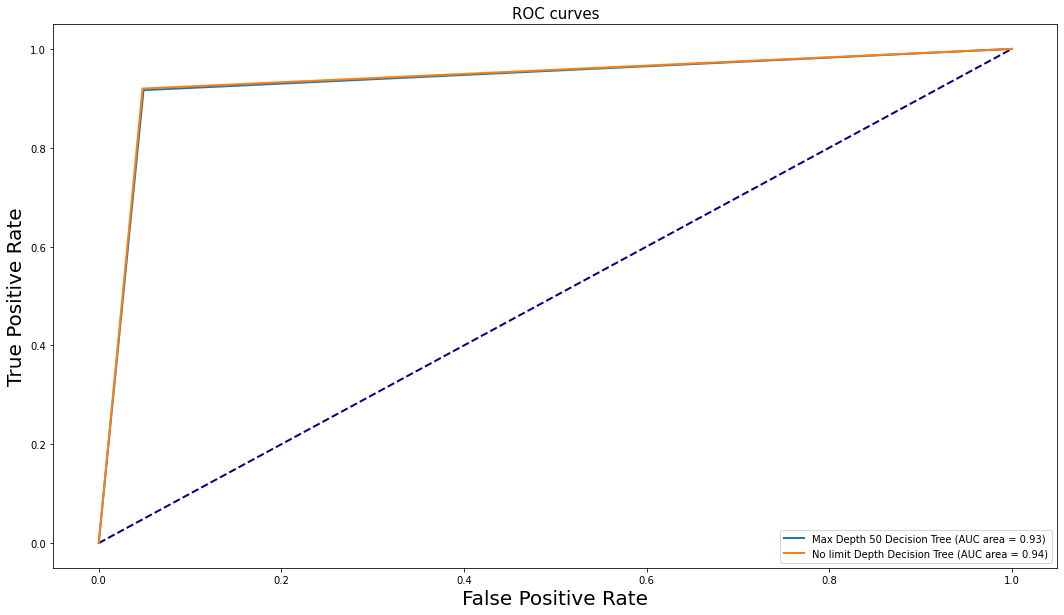

In [39]:
decision_tree_classifiers_second_part = [
    classifier('Max Depth 50 Decision Tree', DecisionTreeClassifier(max_depth=50)),
    classifier('No limit Depth Decision Tree', DecisionTreeClassifier()),
]

train_evaluate(decision_tree_classifiers_second_part)

# Explicando os resultados

**Profundidade Máxima = 5:** 

A precisão no conjunto de teste e treinamento convergem à medida que a capacidade aumenta. \
Quando isso ocorre, infere-se que o modelo está sendo treinado corretamente com baixo viés e variância.
 
**Profundidade Máxima = 20/30/40/50/Sem Limites** 

Para valores maiores, observa-se que o score no conjunto de treinamento é 1, ou se aproxima de 1 para qualquer capacidade (ou seja, decorou o dado). \
Com mais de 2500 dados, a acurácia no teste começa a cair, o modelo fica muito sensitivo aos dados de treino, ou seja, com alta variância ,ficando perceptível que ele está em overfit.


---

# SVM
O SVM é um classificador que trabalha com o conceito de margem máxima. Ele irá ajustar um limite de decisão que permita minimizar o erro de classificação ao passo que busca maximizar a margem que separa os exemplos das duas classes.

**`Tarefa:`** Avaliar os kernels linear, sigmoid, polinomial e RBF.

Foi utilizado o classificador `SVC`, que implementa todos as funções kernels solicitados neste trabalho.

Para esta tarefa, cada kernel foi devidamente avaliado com o **`C`** igual a 1.

C é um parâmetro de regularização, responsável por aplicar penalidades aos exemplos que ultrapassam a margem do SVM.



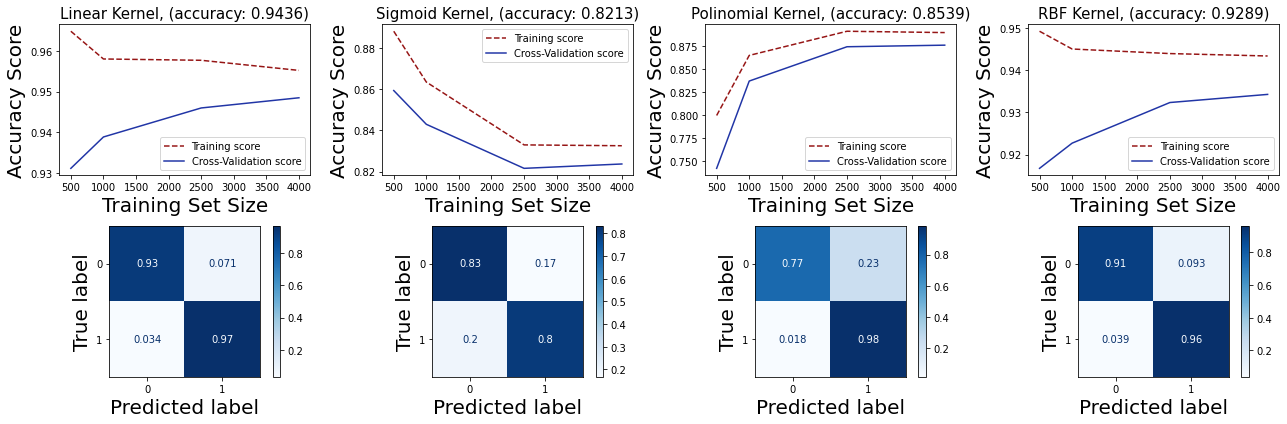

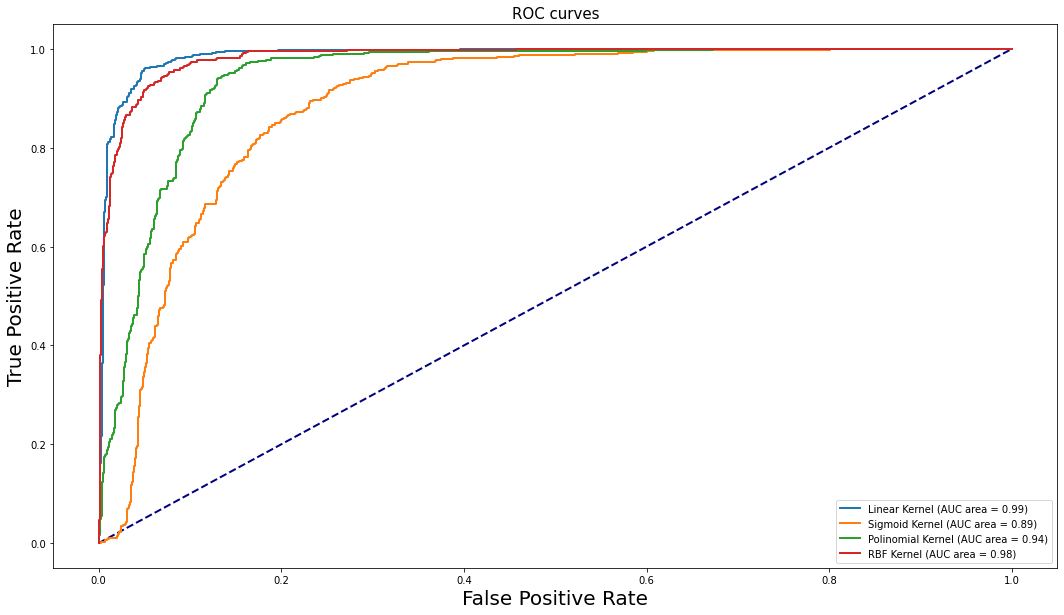

In [40]:
svm_classifiers = [
    classifier('Linear Kernel', SVC(kernel="linear", C=1)),
    classifier('Sigmoid Kernel', SVC(kernel="sigmoid", C=1)),
    classifier('Polinomial Kernel', SVC(kernel="poly", C=1)),
    classifier('RBF Kernel', SVC(kernel="rbf", C=1))
]

train_evaluate(svm_classifiers)

 # Explicando os resultados
- **Kernel Linear** 
 
O kernel linear mantém a estrutura dos dados com o formato original e busca criar uma linha/plano que melhor separa os dados.
 
Percebe-se que dentre os experimentos, este foi o que apresentou os melhores resultados tanto em acurácia no conjunto de teste quanto em termos de precisão e revocação, já que em ambas as respectivas métricas os resultados foram maiores que 90%.
 
Como este foi o kernel com melhor resultado, isso indica que o dado pode ser separado através de uma linha
 
- **Kernel Sigmoid**: 
 
Este foi o kernel que obteve a pior performance perante os testes.
 
A partir da curva de aprendizado percebe-se que à medida que a capacidade aumenta, o algoritmo performa de forma pior, indicando uma incapacidade de aprender mais com novos dados, sendo este um estado de underfit do modelo.
 
Com a matriz de confusão percebe-se que o algoritmo teve sua pior performance em classificar valores positivos, acertando apenas 79% das previsões. 
 
Já na curva ROC o comportamento observado é reforçado pelo desempenho no eixo True Positive Rate e pela área abaixo à Curva AUC.
 
Observando a curva ROC, temos que o modelo tem muito a melhorar, já que ele se posiciona longe do canto superior esquerdo do gráfico.
 
 
- **Kernel Polinomial**: 
 
A partir da matriz de confusão percebe-se que o kernel polinomial obteve bons resultados na predição de valores positivos ("CONFIRMED"), obtendo uma precisão de 97%. 
 
Já a performance geral foi afetada pela menor precisão em valores negativos. 
 
Observando a curva ROC, temos que o modelo tem muito a melhorar, já que ele se posiciona longe do canto superior esquerdo do gráfico.
 
- **Kernel RBF**: 
 
O kernel RBF obteve a segunda melhor performance com 92% de precisão. Além disso, obteve alta revocação 94% e alta precisão 92%.

Observando a curva ROC, temos que o modelo é um bom modelo para predizer os dados, já que ele se posiciona perto do canto superior esquerdo do gráfico.


---

# kNN
O K-NN é um classificador que baseia-se no cálculo da distância para os k-vizinhos mais próximos. \
Onde uma nova instância será classificada de acordo com a classificação majoritária dos k-vizinhos mais próximos.

**`Tarefa`:**

Variar o número k de vizinhos e mostrar os resultados graficamente.

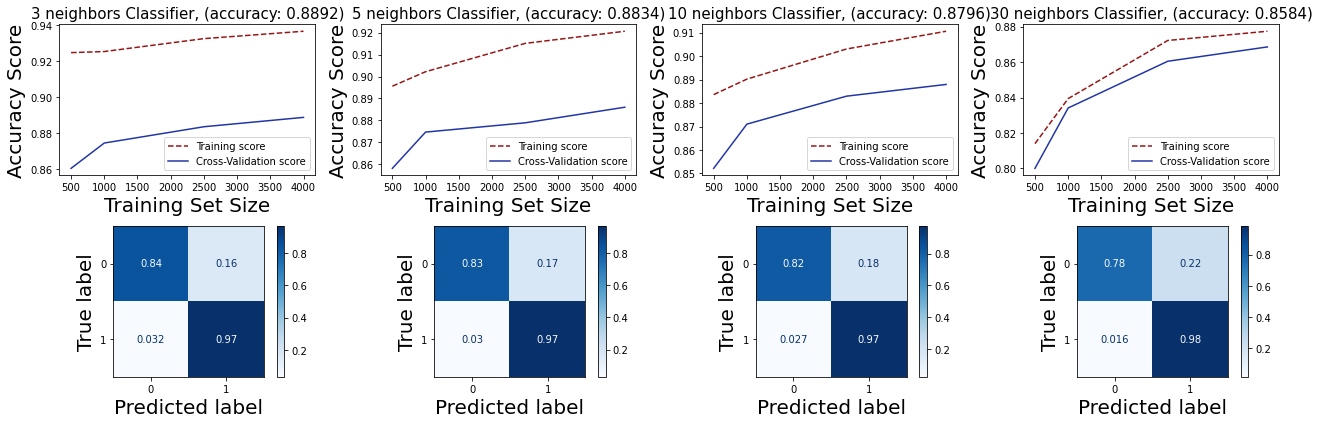

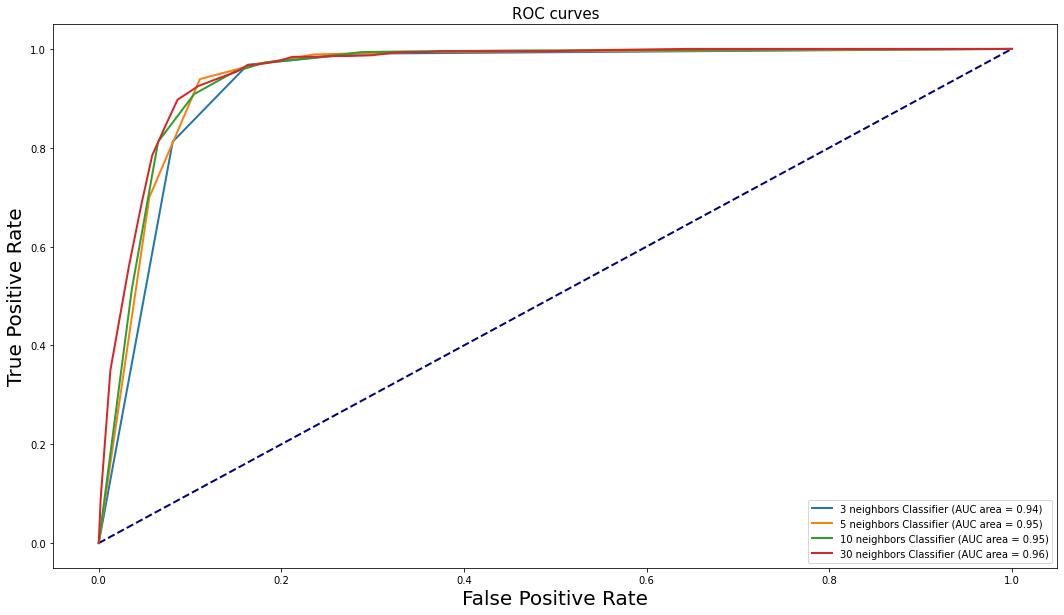

In [47]:
knn_classifiers = [
    classifier('3 neighbors Classifier',  KNeighborsClassifier(3)),
    classifier('5 neighbors Classifier',  KNeighborsClassifier(5)),
    classifier('10 neighbors Classifier', KNeighborsClassifier(10)),
    classifier('30 neighbors Classifier', KNeighborsClassifier(30)),
]

train_evaluate(knn_classifiers)

# Explicando os resultados

De forma geral é possível perceber que todos os modelos possuem bom valor de revocação (de 0.94 à 0.97), ao passo que a especificidade obtida é menor.

O menor valor para a especificidade, que é a proporção de instâncias negativas que são classificadas corretamente como negativas, pode ser um indício  \
que as features positivas estão mais próximas, enquanto as features das instâncias negativas não estão entre os k vizinhos mais próximos.
 
Analisando a curva de aprendizado dos modelos fica claro que a precisão no conjunto de teste e no de treinamento aumenta à medida que aumenta-se a capacidade. 

Indicando que o modelo pode ser treinado com mais dados.

---

# Random Forest

Uma Random Forest utiliza várias árvores de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão e o controle de overfitting. \
O número de árvores é um hiper-parâmetro para o classificador.

**`Tarefa:`** 

Variar o número de árvores e mostrar os resultados graficamente.

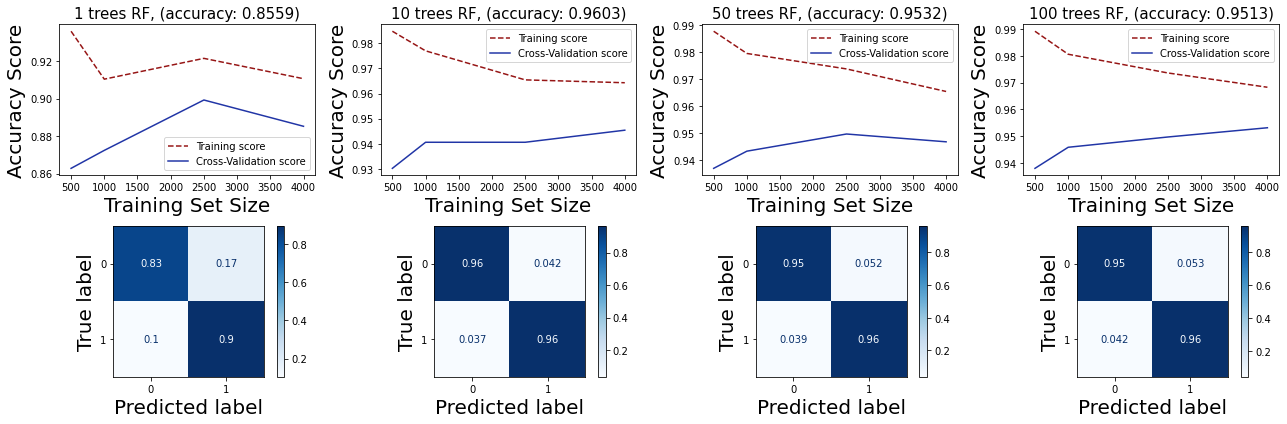

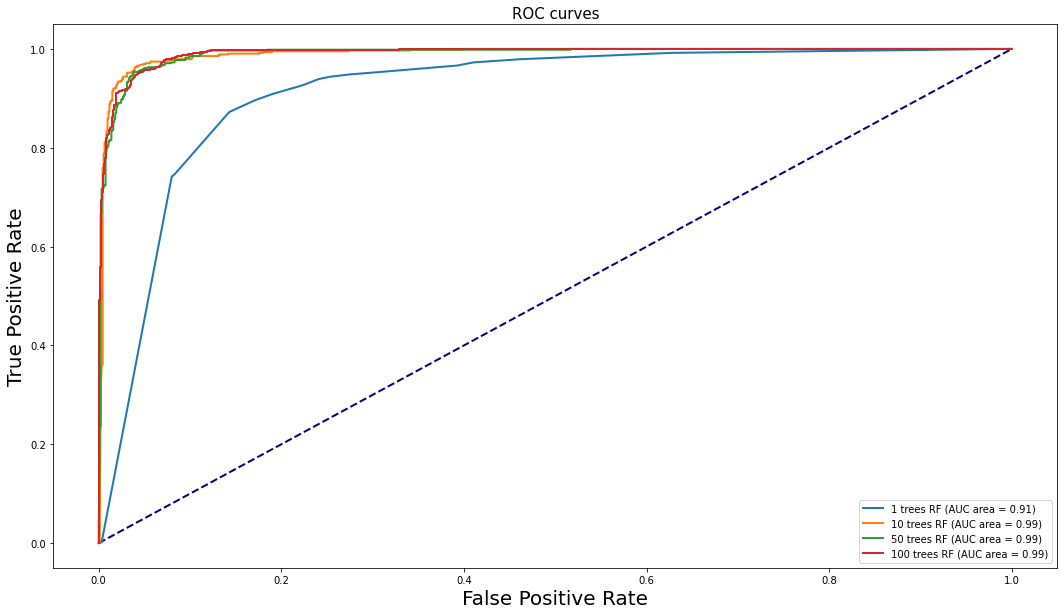

In [42]:
rf_classifiers = [
    classifier('1 trees RF', RandomForestClassifier(max_depth=5, n_estimators=1, max_features=5)),
    classifier('10 trees RF', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=5)),
    classifier('50 trees RF', RandomForestClassifier(max_depth=5, n_estimators=50, max_features=5)),
    classifier('100 trees RF', RandomForestClassifier(max_depth=5, n_estimators=100, max_features=5)),
]

train_evaluate(rf_classifiers)

# Explicando os resultados

**1 Decision Tree**: 
 
Analisando a curva de aprendizado do modelo, observa-se que quando se aumenta o número de entradas de dados acima de 2500, a precisão no conjunto de testes e treinamento cai. 
 
Esse fator ocorre pois com apenas um classificador o modelo não consegue aprender mais com novos dados e aumentar o número de dados não favorece muito o resultado final. 
 
Isso caracteriza o cenário no qual o modelo tem alto viés, já que o modelo não consegue aprender mais características ao ser treinado com novos dados.
 
**10 Decision Trees**: 

Com 10 árvores de decisão, percebemos que a precisão se mantém alta,
Esse cenário apresenta a situação na qual o modelo possui baixo viés e baixa variância, que é a situação ideal para a construção de um modelo.
 
**50 Decision Trees**: 
 
Com 50 árvores de decisão, percebemos que a precisão se mantém alta, igual nos outros experimentos, porém neste cenário há uma diferença na curva de aprendizado. 
 
Depois de 2500 entradas, a precisão no conjunto de testes diminui, o que caracteriza que o modelo está sendo em overfitting e que o treinamento deveria ter parado de forma antecipada.
 
**100 Decision Trees**: 
 
Com 100 decision Trees, percebemos que o modelo se comporta de forma similar à quando utiliza-se apenas 10 decision trees. 
 
É perceptível que a precisão no conjunto de teste e treinamento convergem, o que caracteriza que o modelo ainda pode ser treinado com mais dados.


---

## Gradient Tree Boosting
O Gradient Tree Boosting cria uma função de perda e agrega o valor de decision trees para fazer uma classificação mais robusta.

**`Tarefa:`** 
Variar o número de iterações e mostrar os resultados graficamente.


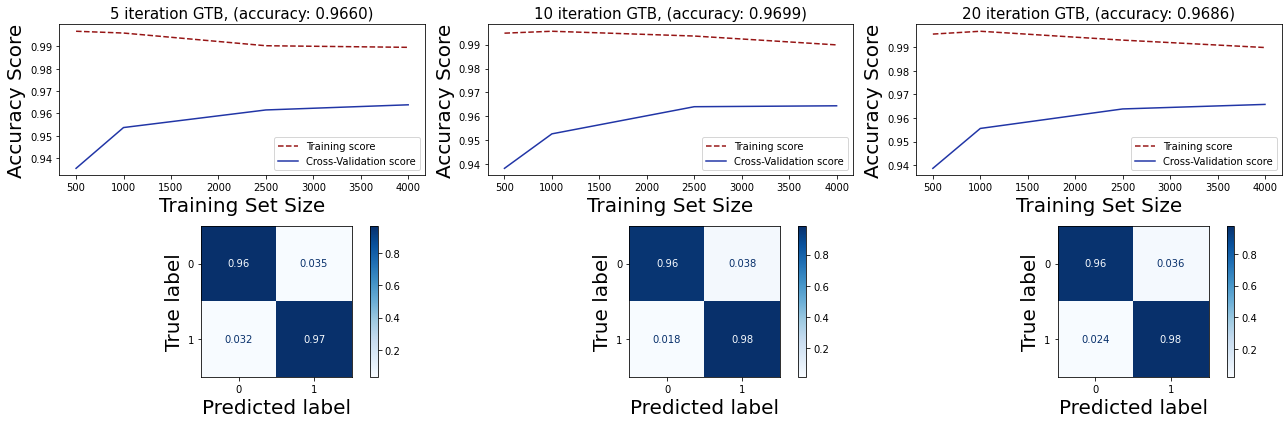

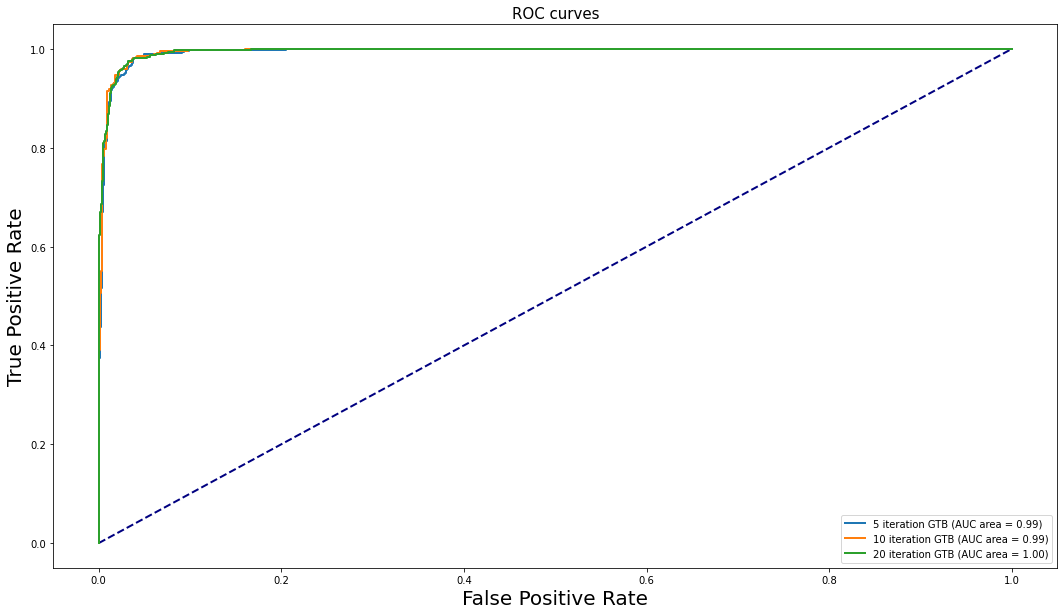

In [40]:
gradient_tree_boosting_classifiers = [
    classifier('5 iteration GTB', GradientBoostingClassifier(n_iter_no_change=5)),
    classifier('10 iteration GTB', GradientBoostingClassifier(n_iter_no_change=10)),
    classifier('20 iteration GTB', GradientBoostingClassifier(n_iter_no_change=20)),
]

train_evaluate(gradient_tree_boosting_classifiers)

# Explicando os resultados
Para avaliar a performance dos modelos de Gradient Tree Boosting, foram criados 3 modelos que variam o número de interações no treinamento.
 
A precisão nos 3 experimentos se manteve em 96.7% para todos os experimentos.
Dada a sua revocação, especificidade e a curva ROC, o classificador prevê acuradamente as classes negativas e positivas de forma correta.
 
À partir das curvas de aprendizado, que são similares, nota-se que a precisão no conjunto de teste e treinamento convergem, isso significa que os modelos podem receber mais dados.}

## Referências
https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646 \
https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c \
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5 \
https://towardsdatascience.com/understanding-random-forest-58381e0602d2 